## Time Series Analysis – Part2a – Stationarity & Differencing Experimentation
1.	Import libraries & set directory paths
2.	Import dataset and check dimensions and columns.
    -	Import: time_series_requests_per_day_from_Jun2020.csv
3.	Convert date column from string to date & check min and max dates.
4.	Convert dataframe to time series
5.	Time series decomposition
6.	Test for Stationarity
    -	Dickey-Fuller Test
    -	Autocorrelation
7.	Converting Non-Station date to Stationary using Differencing
    -	Re-testing using Dickey- Fuller & Autocorrelation
    -	12 rounds of Differencing carried out to get a Stationary Time Series
    -   Export to: time_series_requests_per_day_from_Jun2020_Diff(12).csv
    
NB: 12 rounds of Differencing did not remove the autocorrelation in the time-series.  Plan B is to calculate a 7 day moving average and re-apply Stationarity & Autocorrelation tests, followed by Differencing, refer to notebook Part2b.

### import libraries

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# The use of .api also import the public access versin of statsmodels
# statsmodels handles statistical models
import statsmodels.api as sm

# Import warnings & disable deprecation warnings that could indicate, for instance, a suspended library or feature. 
    # These are more relevant to developers and very seldom to analysts.
import warnings
warnings.filterwarnings("ignore")

import quandl

# 'fivethirtyeight' is a styling option for how your plots will appear.
    # More examples:
    # https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    # https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html
plt.style.use('fivethirtyeight')

### set directory paths

In [2]:
dataset = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\02 Data'
dataset

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\02 Data'

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\04 Analysis'

## Import Time Series data
    Daily sign requests made between 1st June 2020 and 31st August 2021

In [4]:
df_request_day = pd.read_csv(os.path.join(dataset,'time_series_requests_per_day_from_Jun2020.csv'))
df_request_day.head()

,date,requests_per_day
0,2020-06-01,55
1,2020-06-02,73
2,2020-06-03,56
3,2020-06-04,53
4,2020-06-05,57


### check dimensions & data types

In [5]:
df_request_day.shape

(457, 2)

In [6]:
df_request_day.dtypes

date                object
requests_per_day     int64
dtype: object

### convert date column from string to date format

In [7]:
df_request_day['date'] = pd.to_datetime(df_request_day['date'], format='%Y-%m-%d')

In [8]:
df_request_day.dtypes

date                datetime64[ns]
requests_per_day             int64
dtype: object

### check min and max values for request_date
    to ensure conversion carried out correctly

In [9]:
df_request_day['date'].min()

Timestamp('2020-06-01 00:00:00')

In [10]:
df_request_day['date'].max()

Timestamp('2021-08-31 00:00:00')

### convert to time series by setting the 'date' as the index

In [11]:
df_request_day = df_request_day.set_index(['date'])
df_request_day.head()

,requests_per_day
date,
2020-06-01,55
2020-06-02,73
2020-06-03,56
2020-06-04,53
2020-06-05,57


In [12]:
df_request_day.tail()

,requests_per_day
date,
2021-08-27,33
2021-08-28,9
2021-08-29,0
2021-08-30,0
2021-08-31,38


### check for nulls

In [13]:
df_request_day.isnull().sum()

requests_per_day    0
dtype: int64

## Display as time series plot

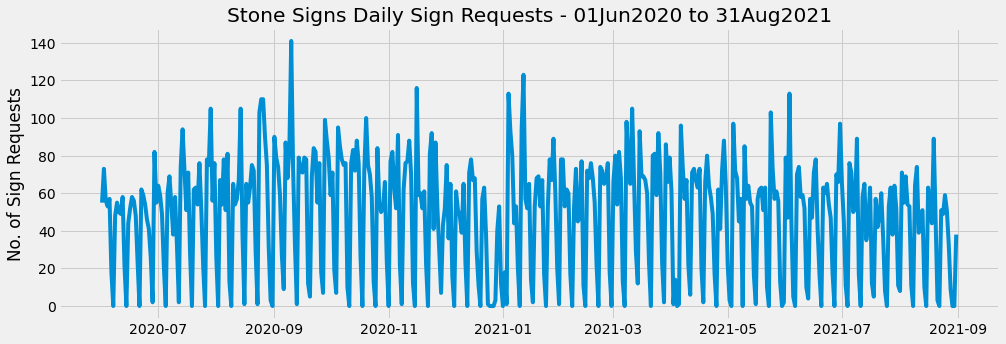

In [14]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_request_day)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests - 01Jun2020 to 31Aug2021.png'))

## Time Series Decompostion
    1) Define a fixed size for all special charts using rcParams.
    2) Carry out the decomposition.
    3) Display as plot.

In [14]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

In [16]:
decomposition = sm.tsa.seasonal_decompose(df_request_day, model='additive') 

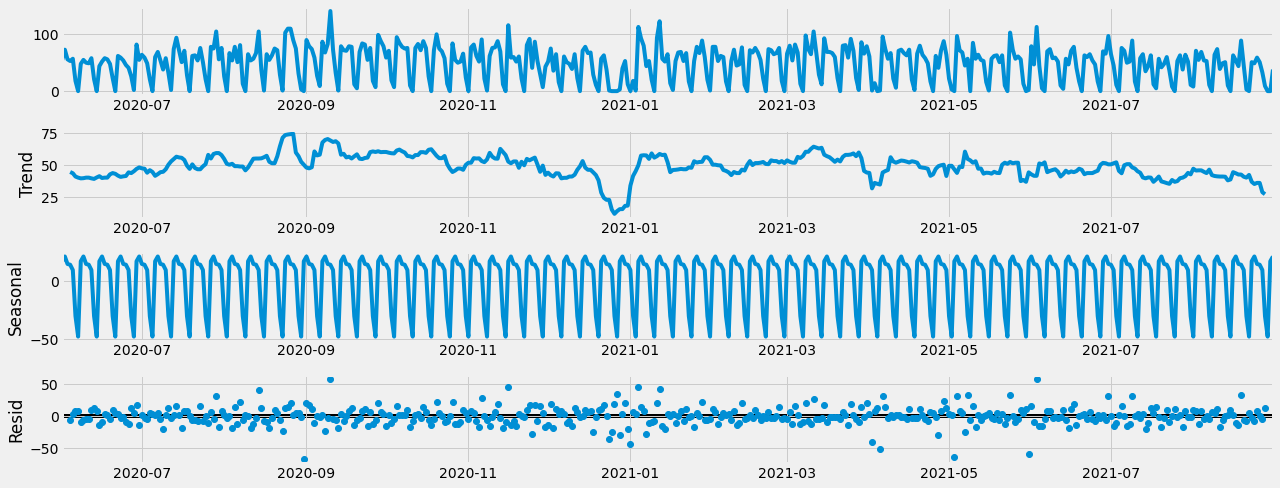

In [17]:
decomposition.plot()
plt.savefig(os.path.join(vizpath,'Time Series - Daily Request Decomposition - 01Jun2020 to 31Aug2021.png'))

#### Observations of filtered time sereis:
1.	Trend: as an overall picture, the Trend is relatively steady with the exception of End2020.
2.  Seasonaility: Seasonality is present, which is generally to be expeceted.
3.  Residual: There is a strong existence of noise which is not uncommon for daily data values.

## Stationarity Checks:
-   DickeyFuller
-   Autocorrelation

### Dickey-Fuller Test for Stationarity
1.   Import the adfuller() function
2.   Create a user-defined function
3.   Run the test
4.   Interpret the results

### import adfuller( ) function

In [18]:
from statsmodels.tsa.stattools import adfuller

### define function: dickey_fuller

In [19]:
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Test for Stationarity:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])

    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print (result)

### run the dickey-fuller test

In [20]:
dickey_fuller(df_request_day['requests_per_day'])

Dickey-Fuller Test for Stationarity:
Test Statistic                  -3.003297
p-value                          0.034588
Number of Lags Used             13.000000
Number of Observations Used    443.000000
Critical Value (1%)             -3.445198
Critical Value (5%)             -2.868086
Critical Value (10%)            -2.570257
dtype: float64


### Interpret the results

Dickey-Fuller Result Measures:
1.   p-value:
     - a measure of strength of evidence.
     - the smaller the p-value the less likely the outcome is by chance.
     - p-value should be <= 5% (0.05).
     

2.   Test Statistic:
      - the result of the actual test taken from the data.
      

3.   Critical Value:
     - to be compared against the Test Statitics.
	 - at an accuracy or Level of Significance (alpha) of 1%, 5% or 10%.

Interpreting Dickey-Fuller Results:

- If p-value > 0.05  -->  H0 - Fail to Reject H0
- If p-value < 0.05  -->  Ha - Reject Null Hypothesis


- If Test Statistic > Critial Value  -->  Fail to Reject H0
- If Test Statistic < Critial Value  -->  Reject the Null Hypothesis


- The more negative the Test Statitic; the stronger the rejection of H0.

### DF Results:
    - p-value: 0.03  < alpha: 0.05 = Ha
    - Test Statistic: -3.00 < Critial Value: -2.86 = Ha

The above results mean that H0 can be rejected in favour of Ha, meaning that the data does not contain a Unit Root and is therefore considered Stationary.

### Test for Autocorrelation

### import act and pacf functions

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### display plot

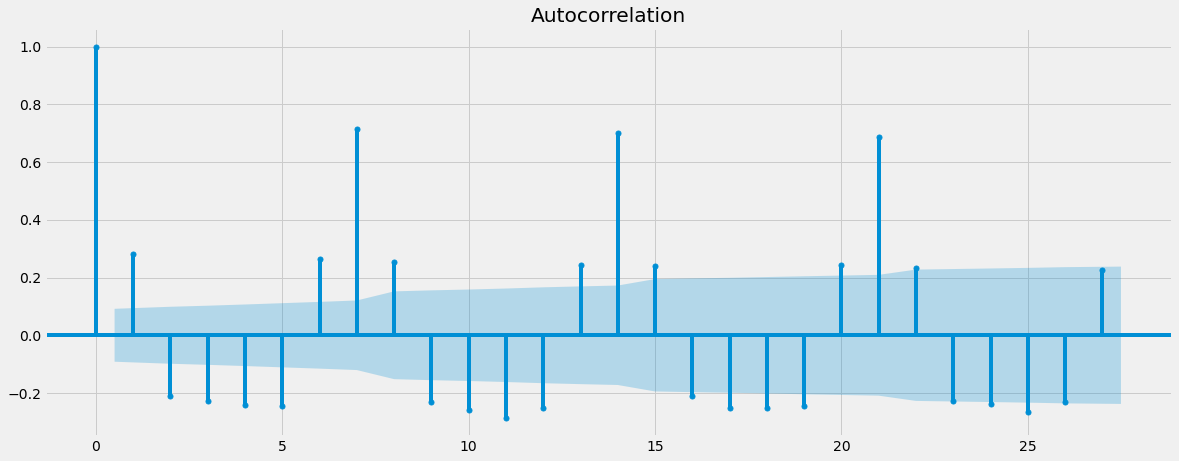

In [22]:
plot_acf(df_request_day)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test - Original Data.png'))

#### Autocorrelation Interpretation
1.  The blue lines represent the lag.
2.  The shaded area represents the Confidence Interval.
3.  Lines above the shaded area indicate Autocorrelation.
4.  Multiple lines above the shaded area indicate non-stationary data.

The autocorrelation plot indicated that the time series has autocorrelation and is therefore considered Non-Stationary.

## Converting a Non-stationary time series to Stationary using Differencing
1.   Apply a round of Differencing.
2.   Check for null values created by the Differencing, & replace with zero.
3.   Plot data.
4.   Re-apply Stationarity checks: Dickey-Fuller & Autocorrelation.
5.   Repeat as necessary.

### differencing round1

In [15]:
df_diff1 = df_request_day - df_request_day.shift(1)
# where shift(1) = t(t-1)

### check for nulls and replace with zero

In [16]:
df_diff1.isnull().sum()

requests_per_day    1
dtype: int64

In [17]:
df_diff1['requests_per_day'] = df_diff1['requests_per_day'].fillna(0)
df_diff1.isnull().sum()

requests_per_day    0
dtype: int64

### display "differenced" data

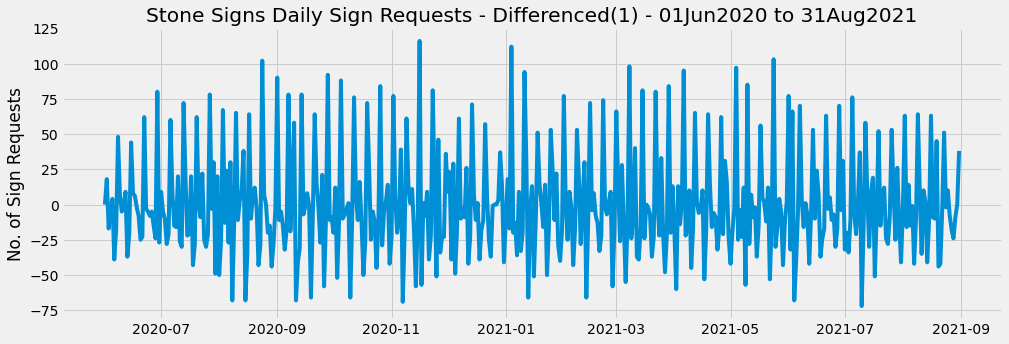

In [26]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(1) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff1)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(1) - 01Jun2020 to 31Aug2021.png'))

### reapply dickey-fuller test
(although results showed as Stationary before differencing was applied)

In [27]:
dickey_fuller(df_diff1)

Dickey-Fuller Test for Stationarity:
Test Statistic                -1.169484e+01
p-value                        1.620079e-21
Number of Lags Used            1.200000e+01
Number of Observations Used    4.440000e+02
Critical Value (1%)           -3.445164e+00
Critical Value (5%)           -2.868072e+00
Critical Value (10%)          -2.570249e+00
dtype: float64


### DF Results:
    - p-value: 0.0000000000000000000016  < alpha: 0.05 = Ha
    - Test Statistic: -11.69 < Critial Value: -2.86 = Ha

The above results still mean that H0 can be rejected in favour of Ha, meaning that the data does not contain a Unit Root and is therefore considered Stationary.

### reapply autocorrelation test

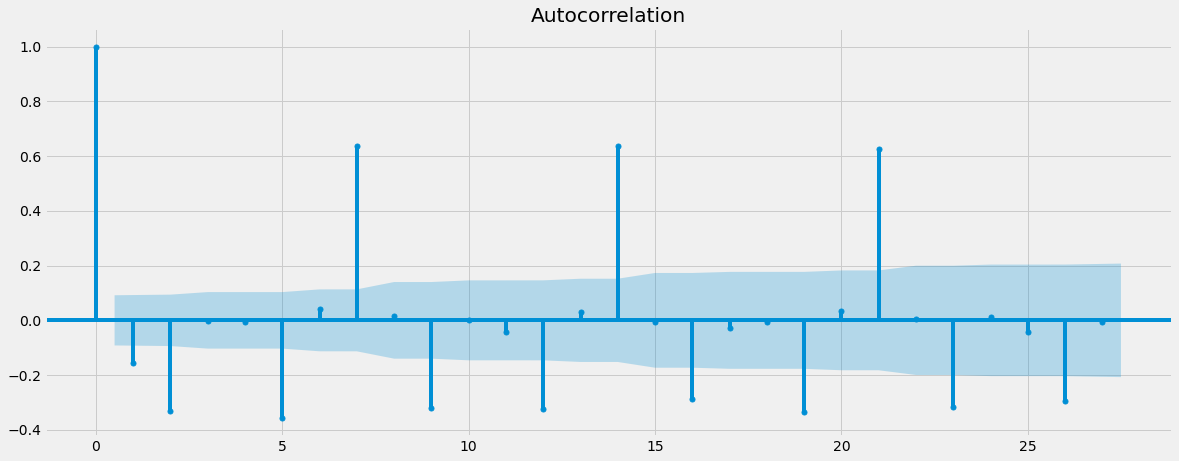

In [28]:
plot_acf(df_diff1)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test1 - Diff(1).png'))

The autocorrelation plot is stillindicating that autocorrlation is present in the data and therefore Non-stationary.  With >10lags above the Confidence Interval (shaded area),it is suitable to apply another round of Differencing.

### differencing round2

In [18]:
df_diff2 = df_diff1 - df_diff1.shift(1)

### check for nulls & replace with zero

In [19]:
df_diff2.isnull().sum()

requests_per_day    1
dtype: int64

In [20]:
df_diff2['requests_per_day'] = df_diff2['requests_per_day'].fillna(0)
df_diff2.isnull().sum()

requests_per_day    0
dtype: int64

### plot diff(2) data

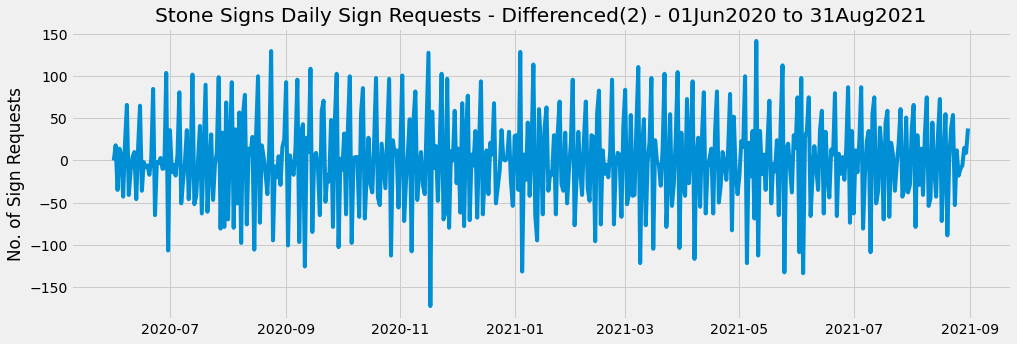

In [32]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(2) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff2)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(2) - 01Jun2020 to 31Aug2021.png'))

It is not necessary to re-apply the Dickey-fuller test because the previous results already show that the time series data is Staionary to a very high Significance Level.

### autocorrelation on diff(2)

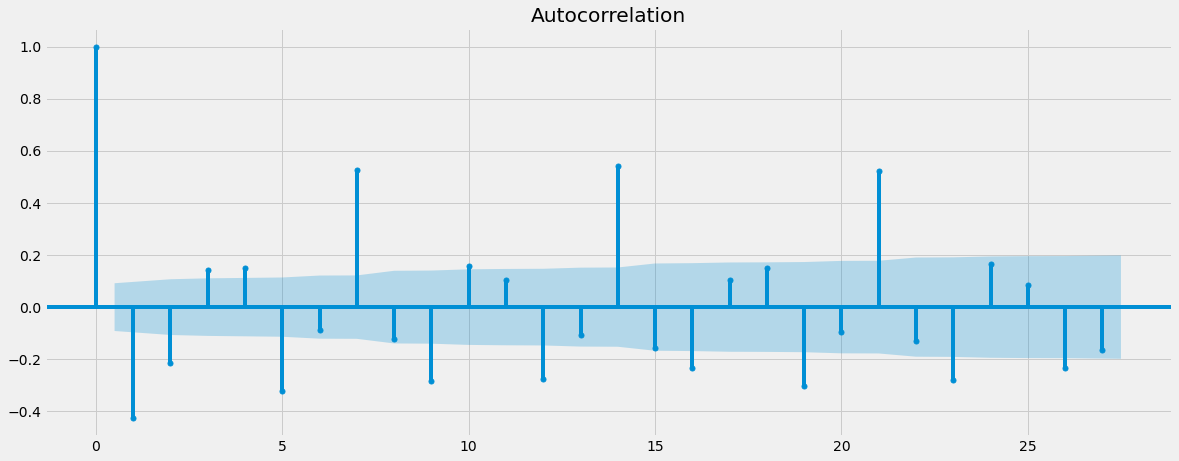

In [33]:
plot_acf(df_diff2)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test2 - Diff(2).png'))

With still >10 lags outside of the Confidence Interval, a third round of Differencing can be applied.

### differencing round3

In [21]:
df_diff3 = df_diff2 - df_diff2.shift(1)

### check for nulls and ereplace with zero

In [22]:
df_diff3.isnull().sum()

requests_per_day    1
dtype: int64

In [23]:
df_diff3['requests_per_day'] = df_diff3['requests_per_day'].fillna(0)
df_diff3.isnull().sum()

requests_per_day    0
dtype: int64

### plot diff(3)

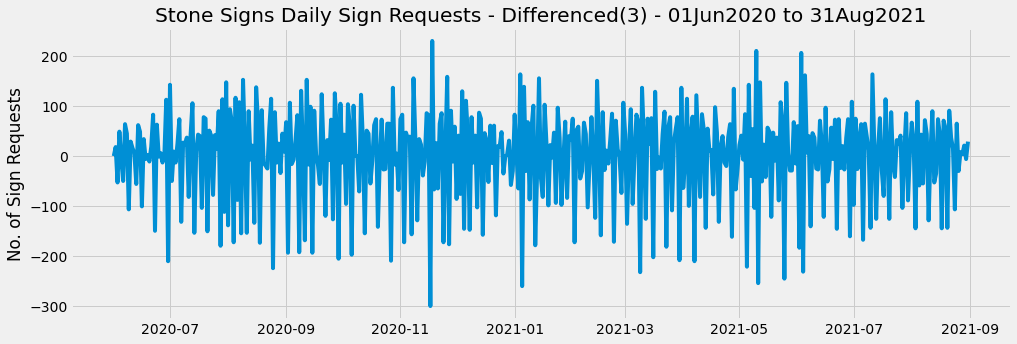

In [37]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(3) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff3)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(3) - 01Jun2020 to 31Aug2021.png'))

### autocorrelation on diff(3)

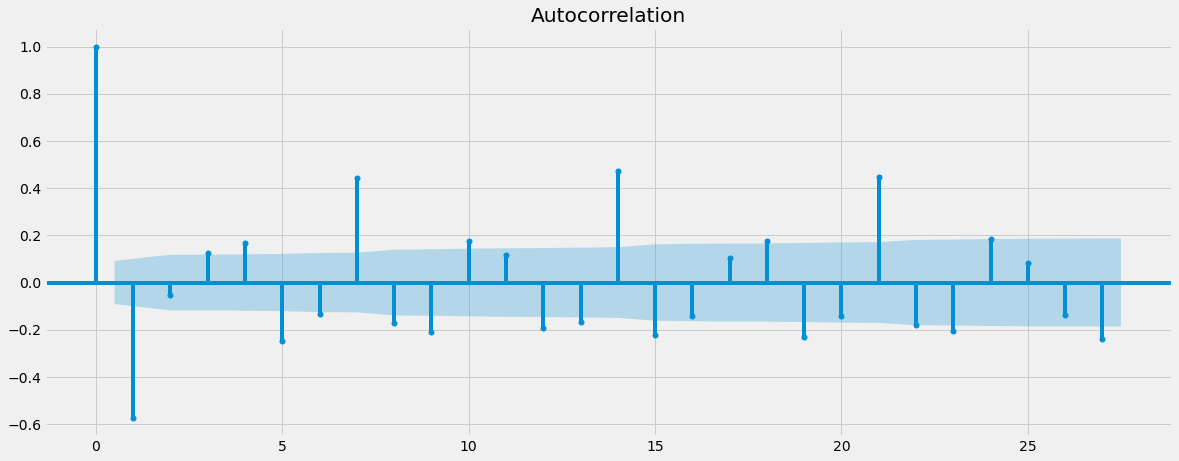

In [38]:
plot_acf(df_diff3)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test3 - Diff(3).png'))

There are still >10 lag outside of the Confidence Interval so that data can be differenced again.

### differencing round4

In [24]:
df_diff4 = df_diff3 - df_diff3.shift(1)

### replace nulls with zero

In [25]:
df_diff4.isnull().sum()

requests_per_day    1
dtype: int64

In [26]:
df_diff4['requests_per_day'] = df_diff4['requests_per_day'].fillna(0)
df_diff4.isnull().sum()

requests_per_day    0
dtype: int64

### plot diff(4)

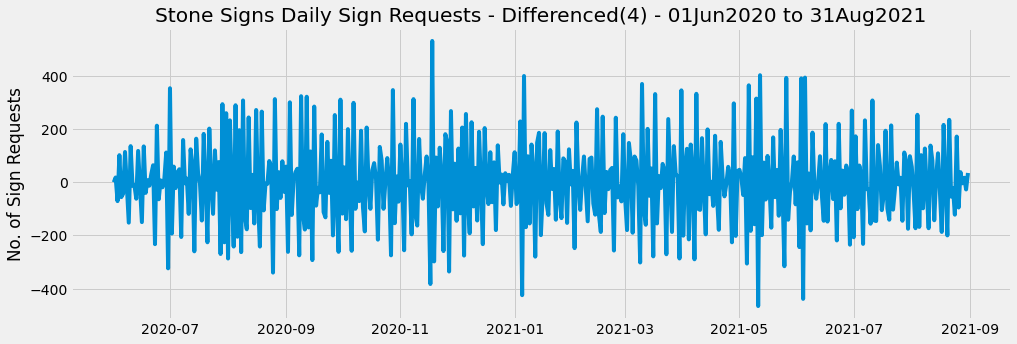

In [42]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(4) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff4)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(4) - 01Jun2020 to 31Aug2021.png'))

### autocorrelation diff(4)

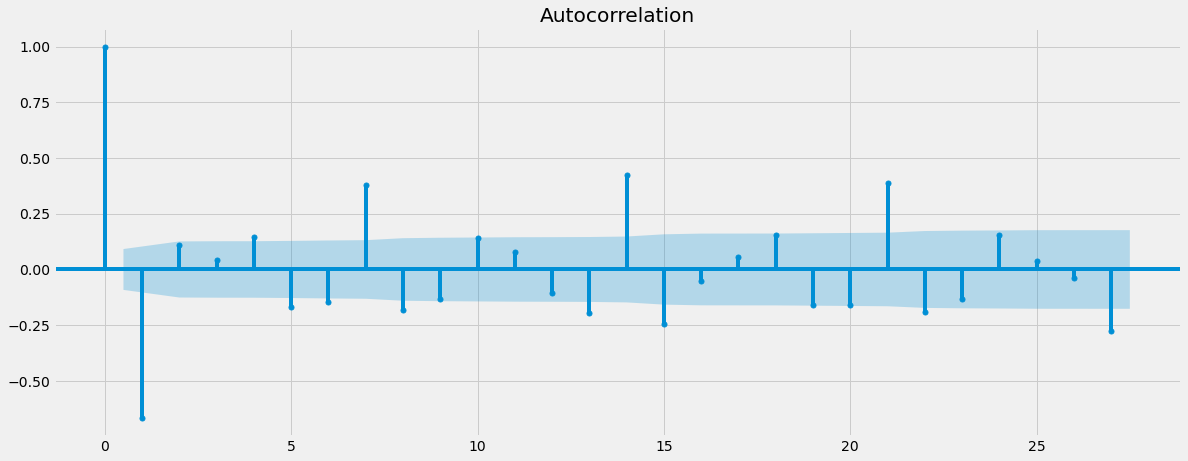

In [43]:
plot_acf(df_diff4)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test4 - Diff(4).png'))

The data could benefit for a fifth round of Differencing.

### differencing round5

In [27]:
df_diff5 = df_diff4 - df_diff4.shift(1)

### replace nulls with zero

In [28]:
df_diff5['requests_per_day'] = df_diff5['requests_per_day'].fillna(0)
df_diff5.isnull().sum()

requests_per_day    0
dtype: int64

### plot diff(5)

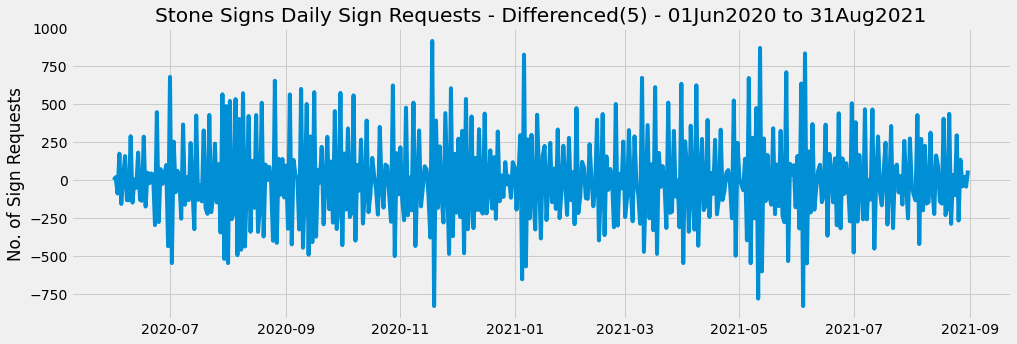

In [46]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(5) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff5)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(5) - 01Jun2020 to 31Aug2021.png'))

### autocorrelation diff(5)

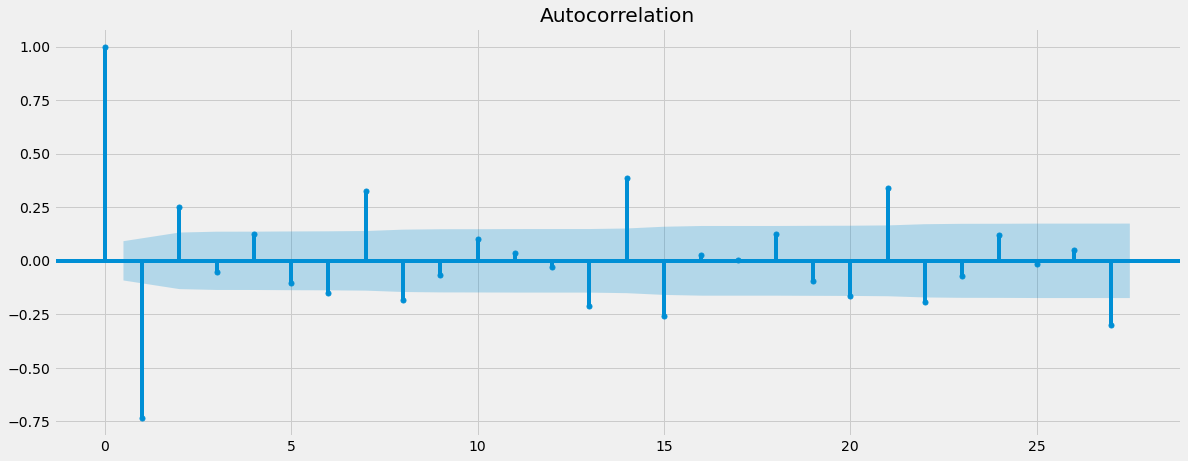

In [47]:
plot_acf(df_diff5)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test5 - Diff(5).png'))

### differencing round6

In [29]:
df_diff6 = df_diff5 - df_diff5.shift(1)

### replace nulls with zero

In [30]:
df_diff6['requests_per_day'] = df_diff6['requests_per_day'].fillna(0)
df_diff6.isnull().sum()

requests_per_day    0
dtype: int64

### plot diff(6)

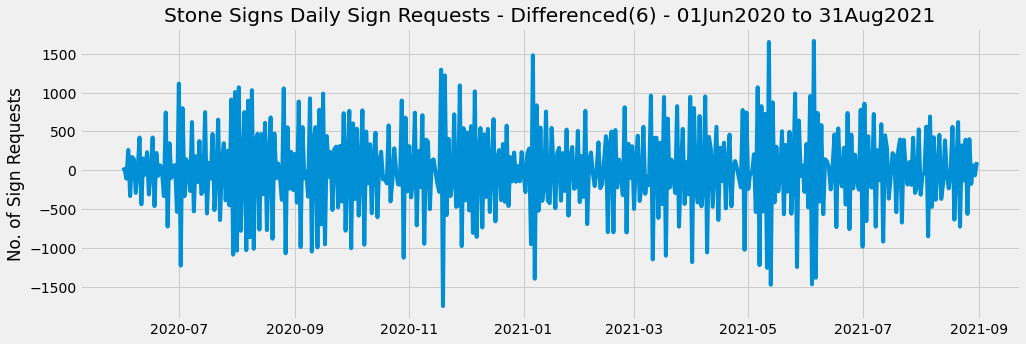

In [50]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(6) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff6)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(6) - 01Jun2020 to 31Aug2021.png'))

### autocorrelation diff(6)

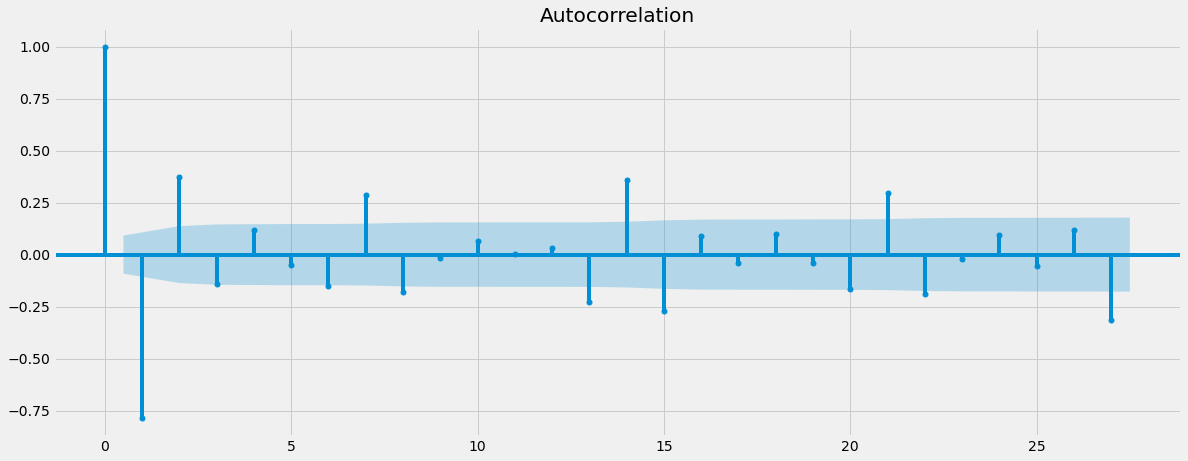

In [51]:
plot_acf(df_diff6)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test6 - Diff(6).png'))

There are still 10 lags outside of the Confidence Interval.  One more round of differecing to apply...

### differencing round7

In [31]:
df_diff7 = df_diff6 - df_diff6.shift(1)

### replace nulls with zero

In [32]:
df_diff7['requests_per_day'] = df_diff7['requests_per_day'].fillna(0)
df_diff7.isnull().sum()

requests_per_day    0
dtype: int64

### plot diff(7)

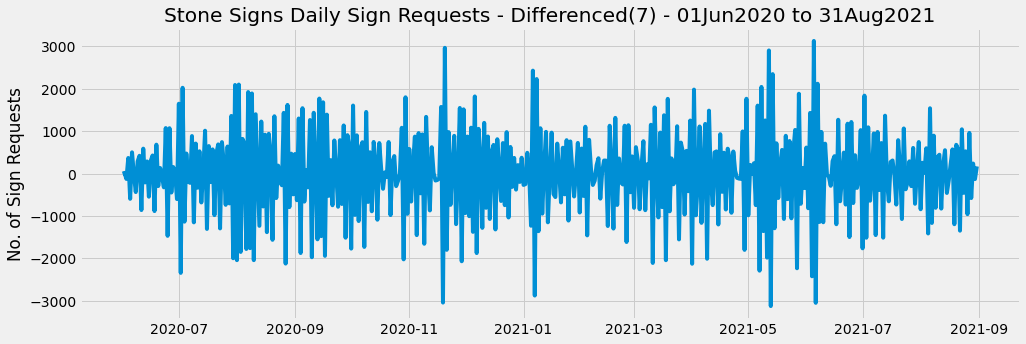

In [54]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(7) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff7)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(7) - 01Jun2020 to 31Aug2021.png'))

### autocorrelation diff(7)

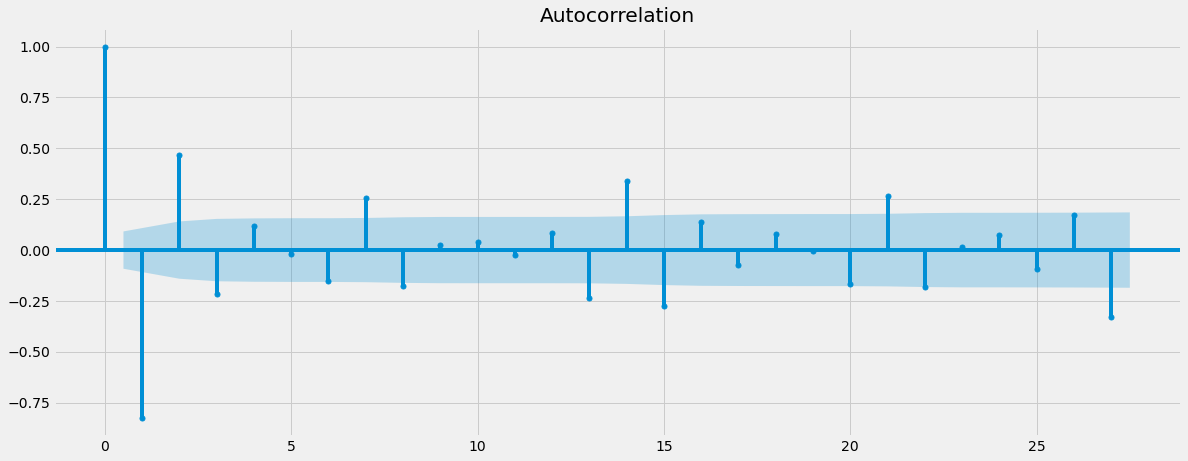

In [56]:
plot_acf(df_diff7)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test7 - Diff(7).png'))

A total of 7 rounds of differencing has been carried out to suppress the autocorrelation in the time series to provide a Stationary data set suitable for applying forecasting algorithms such as ARIMA.

### differencing round8

In [33]:
df_diff8 = df_diff7 - df_diff7.shift(1)

### replace nulls with zero

In [34]:
df_diff8['requests_per_day'] = df_diff8['requests_per_day'].fillna(0)
df_diff8.isnull().sum()

requests_per_day    0
dtype: int64

### plot diff(8)

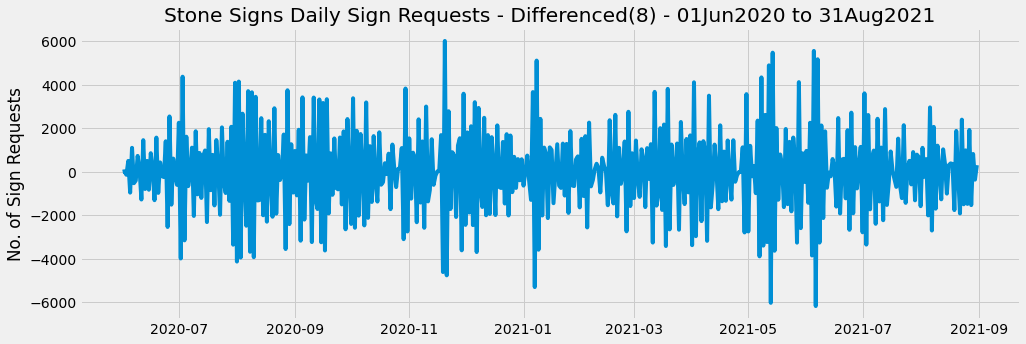

In [59]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(8) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff8)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(8) - 01Jun2020 to 31Aug2021.png'))

### autocorrelation diff(8)

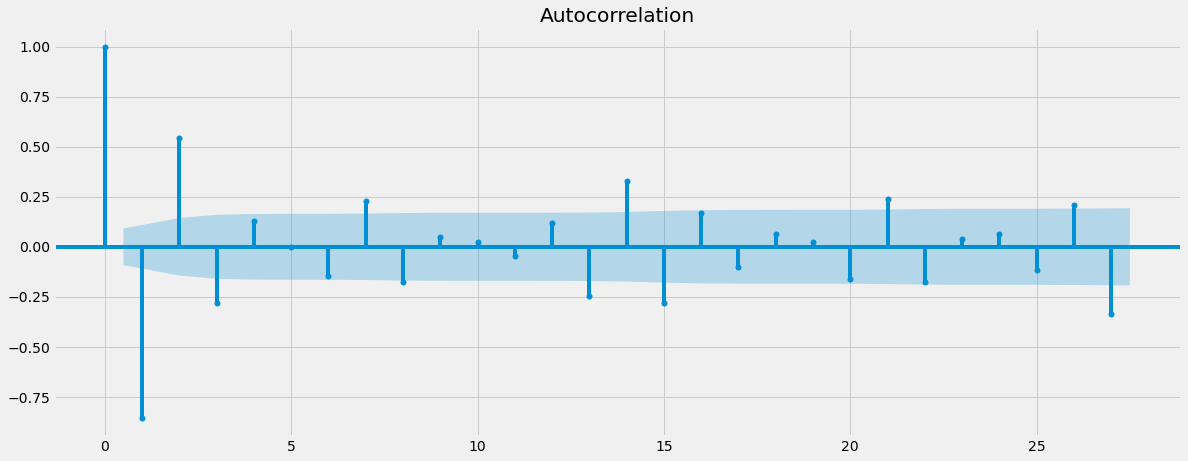

In [60]:
plot_acf(df_diff8)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test8 - Diff(8).png'))

### differencing round 10

In [35]:
df_diff9 = df_diff8 - df_diff8.shift(1)

### replace null with zero

In [36]:
df_diff9['requests_per_day'] = df_diff9['requests_per_day'].fillna(0)
df_diff9.isnull().sum()

requests_per_day    0
dtype: int64

### plot diff(9)

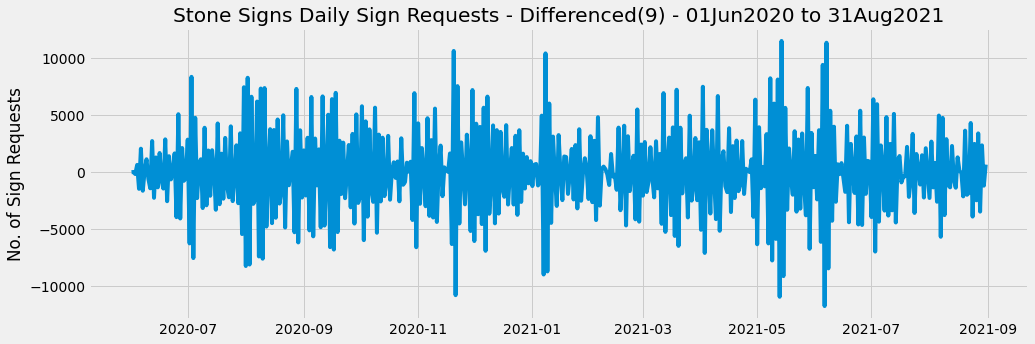

In [45]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(9) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff9)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(9) - 01Jun2020 to 31Aug2021.png'))

### autocorrelation diff(9)

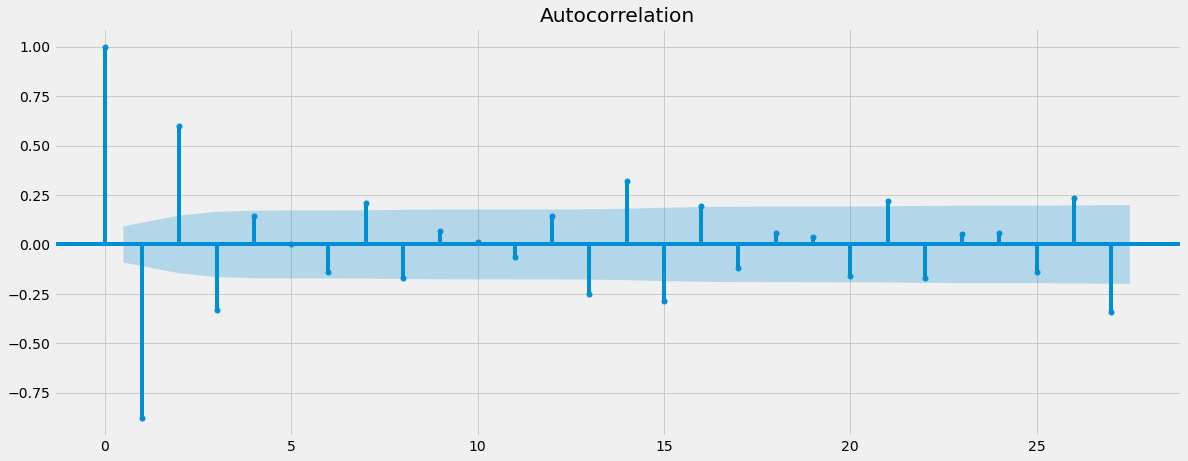

In [40]:
plot_acf(df_diff9)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test9 - Diff(9).png'))

### differencing round10

In [41]:
df_diff10 = df_diff9 - df_diff9.shift(1)

### replace nulls with zero

In [42]:
df_diff10['requests_per_day'] = df_diff10['requests_per_day'].fillna(0)
df_diff10.isnull().sum()

requests_per_day    0
dtype: int64

### plot diff(10)

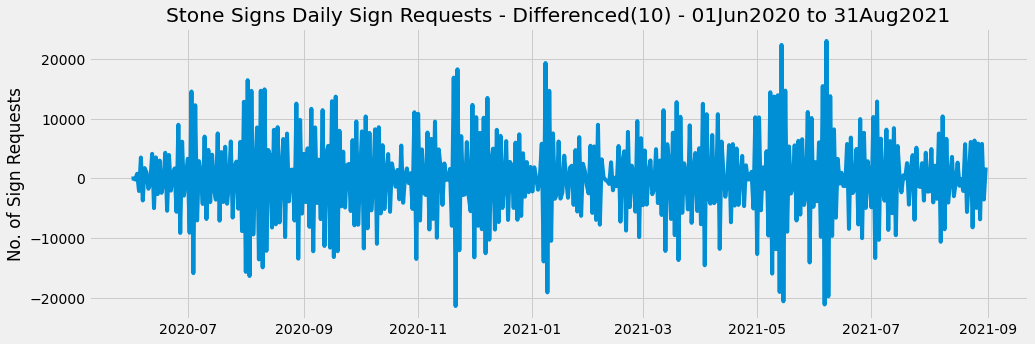

In [46]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(10) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff10)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(10) - 01Jun2020 to 31Aug2021.png'))

### autocorrelation diff(10)

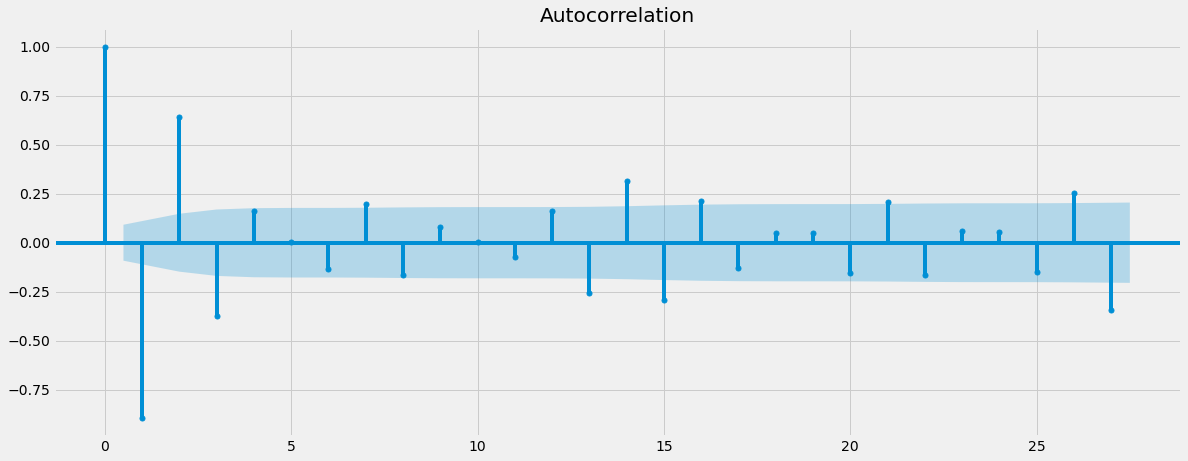

In [47]:
plot_acf(df_diff10)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test10 - Diff(10).png'))

### round 11

In [48]:
df_diff11 = df_diff10 - df_diff10.shift(1)

In [49]:
df_diff11['requests_per_day'] = df_diff11['requests_per_day'].fillna(0)
df_diff11.isnull().sum()

requests_per_day    0
dtype: int64

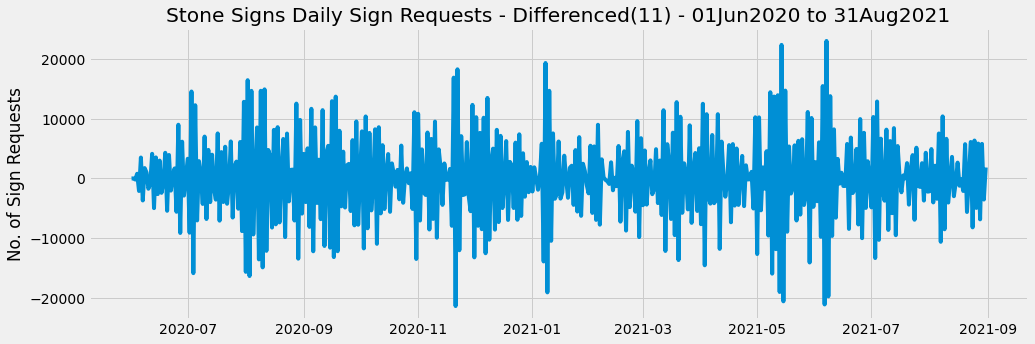

In [50]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(11) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff10)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(11) - 01Jun2020 to 31Aug2021.png'))

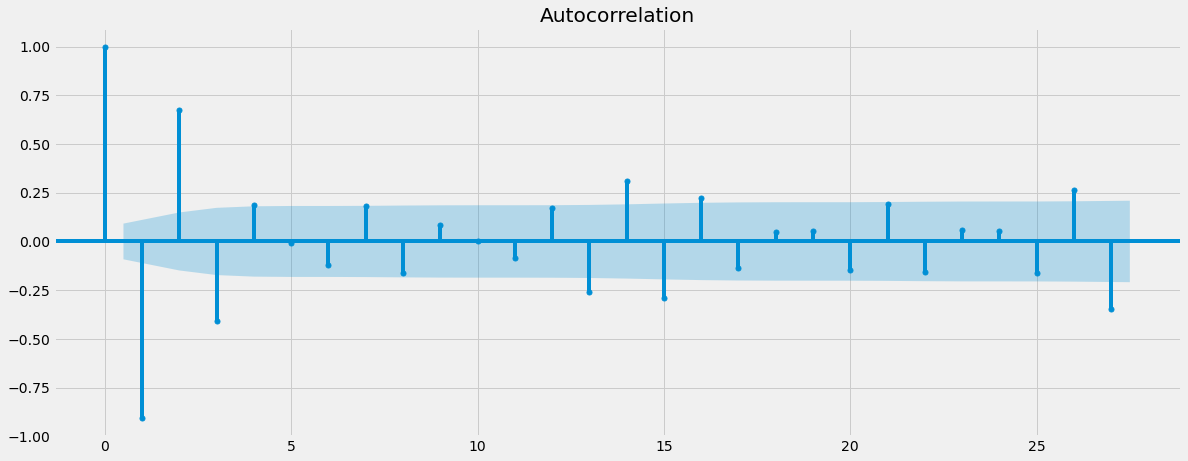

In [52]:
plot_acf(df_diff11)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test11 - Diff(11).png'))

### round 12

In [61]:
df_diff12 = df_diff11 - df_diff11.shift(1)

In [62]:
df_diff12['requests_per_day'] = df_diff12['requests_per_day'].fillna(0)
df_diff12.isnull().sum()

requests_per_day    0
dtype: int64

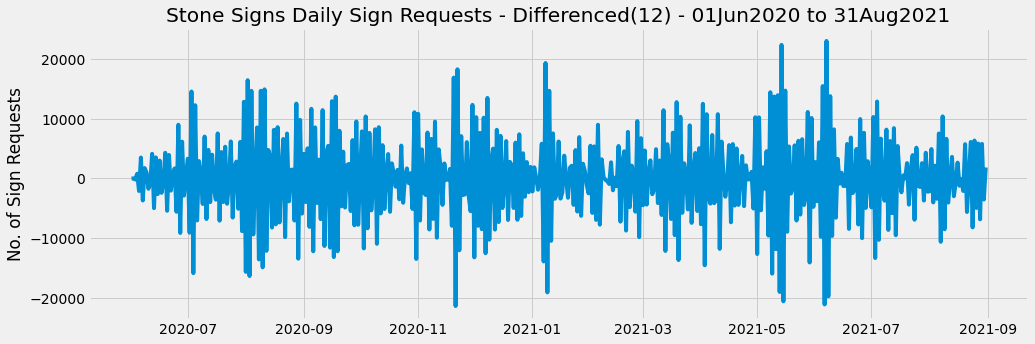

In [55]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - Differenced(12) - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff10)

plt.savefig(os.path.join(vizpath,'Time Series - Stone Signs Daily Sign Requests-Diff(12) - 01Jun2020 to 31Aug2021.png'))

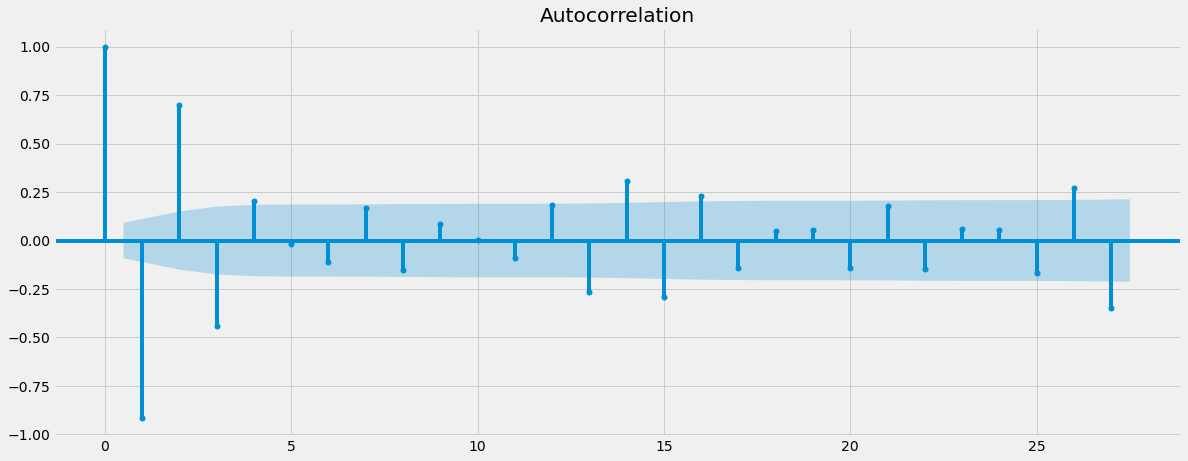

In [56]:
plot_acf(df_diff12)
plt.savefig(os.path.join(vizpath,'Time Series - Autocorrelation Test12 - Diff(12).png'))

### convert time series to dataframe and export to CSV

In [63]:
df_diff12 = df_diff12.reset_index()
df_diff12.head()

,date,requests_per_day
0,2020-06-01,0.0
1,2020-06-02,18.0
2,2020-06-03,-215.0
3,2020-06-04,1174.0
4,2020-06-05,-3868.0


In [64]:
df_diff12.to_csv(os.path.join(dataset,'time_series_requests_per_day_from_Jun2020_Diff(12).csv'), index=False)

NB: 12 rounds of Differencing did not remove the autocorrelation in the time-series.  Plan B is to calculate a 7 day moving average and re-apply Stationarity & Autocorrelation tests, followed by Differencing, refer to notebook Part2b.